# <center> Determination of nitrogen loss from hydrothermal conduits: supplemental calculations for 'Hydrothermal ammonium from a Large Igneous Province mitigated early Eocene climate change' </center> 
#### <center> Nathan Rochelle-Bates$^1$, Morgan T. Jones$^{2,3}$, Joost Frieling$^{4,5}$, Henrik H. Svensen$^6$, Graeme A. MacGilchrist$^1$, Christian Berndt$^7$, Sverre Planke$^{5,8}$, Eva E. Stüeken$^1$ </center> 
####
1.	University of St Andrews, School of Earth & Environmental Sciences, Bute Building, Queen’s Terrace, St Andrews, Fife, KY16 9TS, United Kingdom
2.	Umeå University, Department of Ecology, Environment and Geoscience, 901 87 Umeå, Sweden
3.	University of Oslo, Departments of Geosciences, Sem Sælands vei 1, 0371 Oslo, Norway
4.	University of Oxford, Department of Earth Sciences, South Parks Rd, Oxford OX1 3AN, United Kingdom
5.	Ghent University, Department of Geology, Ghent, Krijgslaan 297, 9000, Belgium 
6.	University of Oslo, The Njord Centre, departments of Geosciences and Physics, Sem Sælands vei 1, 0371 Oslo, Norway
7.	GEOMAR Helmholtz Centre for Ocean Research Kiel, Kiel, Germany
8.	Volcanic Basin Energy Research AS, Blindernveien 5, 0361 Oslo, Norway

In [4]:
# packages
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

import time

rng = np.random.default_rng()


##  Section 1: Generate and test probability density functions for vent geometries
<hr style="border: solid 3px red">

Import estimated vent numbers, then produce and test probability distribution for vent geometries, based on descriptions in Planke et al. 2005. 

In [5]:
#function for sampling a truncated normal distribution

def truncnormsamp (lower, upper, mu, sigma, size=1):    #default is to sample one random value from the distribution
    a = (lower - mu) / sigma
    b = (upper - mu) / sigma
    sample = st.truncnorm.rvs(a, b, mu, sigma, size)
    return (sample)
    

In [6]:
# generate probability density functions for vent geometry data, based on observations from Planke et al., 2005

vent_data = pd.read_csv('HTVC_dists.csv') # read in vent numbers estimated by using vent/sill ratios and total intruded areas for each basin (Jones et al., 2019) 

data = np.array(vent_data) 

# kernel density estimation to find vent umbers in each basin:
porc_kde =  gaussian_kde(data[:,1]) #Porcupine Basin
rock_kde =  gaussian_kde(np.sum(data[:,2:5],axis=1)) # Rockall - recombine sub-areas
green_kde =  gaussian_kde(data[:,6]) # Greenland - comprises the Thetis & Danmarkshavn Basins
vormor_kde =  gaussian_kde(data[:,7]) # Voring & More Basins
farsh_kde =  gaussian_kde(data[:,8]) # Faroe-Shetland Basin

total_kde = gaussian_kde(data[:,9]) # total vent numbers

#create distribution for vent radii (km) and produce pdf
#radii size categories (0.2-1, etc.) from Planke et al. 2005 and sample numbers are defined to give appropriate weighting to each category
radlow = np.array(np.linspace(0.2,1,3000))
radmed = np.array(np.linspace(1,2.5,500))
radhigh = np.array(np.linspace(2.5,5.5,70))
rads=np.concatenate((radlow,radmed,radhigh),axis=0)
rads_kde= gaussian_kde(rads,0.6) # needs to be clipped to upper/lower bounds by fcn, 0.6 is bandwith, which smoothes the combined distribution


Average radius of small vents in generated dist: 0.7419173471114201, Planke value: 0.75
Average radius of medium vents in generated dist: 1.4512143642152036, Planke value: 1.75
Average radius of large vents in generated dist: 3.45672173932604, Planke value: 3.75
Proportion of small vents in generated dist: 0.6506666666666666, Planke value: 0.6212534059945504
Proportion of medium vents in generated dist: 0.316, Planke value: 0.3474114441416894
Proportion of large vents in generated dist: 0.03333333333333333, Planke value: 0.031335149863760216


Text(0.5, 1.0, 'Vent radii distribution')

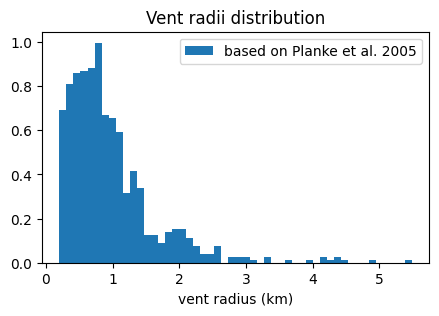

In [7]:
# test generated vent distribution attributes and compare to values quoted in Planke et al., 2005 for Voring-More Basins

population_size = 750 # test population size - based on n obs. in Planke et al., 2005
unclipped_radii = np.squeeze(rads_kde.resample(int(population_size*1.5))) # increasing pop size ensures that there will be enough samples after clipping
test_vent_radii = unclipped_radii[(unclipped_radii>=0.2)&(unclipped_radii<=5.5)] # Clip to min max from Planke 2005. 
test_vent_radii = test_vent_radii[:(population_size)]# km, returns number of values equal to pop size

known_means = [0.75,1.75,3.75] # known mean radii (km) for small (0.5-1 km), medium (1-2.5 km), large (2.5-5.5) vent radius categories - Planke et al., 2005
known_populations = [456,255,23] # known numbers in each size population - Planke 2005
known_proportions = known_populations/np.sum(known_populations) # known proportion of each size fraction

print(f'Average radius of small vents in generated dist: {np.average(test_vent_radii[(test_vent_radii>=0.5) &(test_vent_radii <1)])}, Planke value: 0.75') # test small radius population average - Planke average value quoted for 0.5-1 km, though they also report smaller radii
print(f'Average radius of medium vents in generated dist: {np.average(test_vent_radii[(test_vent_radii>=1) & (test_vent_radii <=2.5)])}, Planke value: 1.75') # test medium radius population average
print(f'Average radius of large vents in generated dist: {np.average(test_vent_radii[(test_vent_radii >2.5)& (test_vent_radii <=5.5)])}, Planke value: 3.75') # test large radius populaiton average

print(f'Proportion of small vents in generated dist: {(np.size(test_vent_radii[(test_vent_radii <1)]))/population_size}, Planke value: {known_proportions[0]}')
print(f'Proportion of medium vents in generated dist: {(np.size(test_vent_radii[(test_vent_radii>=1) & (test_vent_radii <=2.5)]))/population_size}, Planke value: {known_proportions[1]}')
print(f'Proportion of large vents in generated dist: {(np.size(test_vent_radii[(test_vent_radii >2.5)& (test_vent_radii<=5.5)]))/population_size}, Planke value: {known_proportions[2]}')

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,3))
ax.hist(test_vent_radii,bins=50,density='true',label ='based on Planke et al. 2005')
ax.legend()
plt.xlabel('vent radius (km)')
plt.title('Vent radii distribution')


In [8]:
#function for converting two-way-time to depth (not used - using average value instead)

#def TWT_to_depth_fcn(TWT):
 #   depth = 5e-8 * np.power(TWT,3) - 9e-5 * np.power(TWT,2) + 0.9761*TWT # polynomial fit from Faroe-Shetland checkshots in S. Morse (2013) - unpublished MSc dissertation
  #  return depth


average vent depth: 1.4997786455433137 km, Jones et al. 2019 value = 1.2 km
maximum vent depth: 4.293606772398923 km, Jones et al. 2019 value = 4 km
dry density: 1538.9968808343936 kg/m3


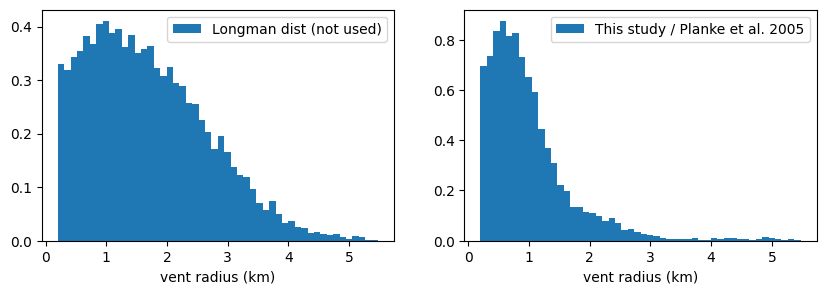

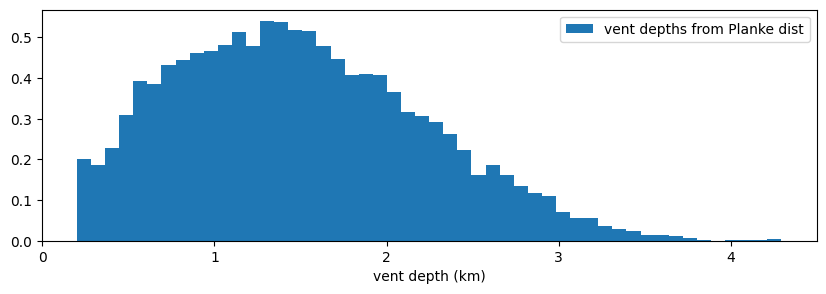

In [9]:
# use radius dist to find average vent depth and calculate corresponding dry density - using calculation in Jones et al., 2019

unclipped_radii = np.squeeze(rads_kde.resample(int(10000*1.5))) #ensures that there will be enough for clipping - (choice of 10000 samples arbitrary)
vent_radii = unclipped_radii[(unclipped_radii>=0.2)&(unclipped_radii<=5.5)] # clips to observed radius range from Planke et al. 2005
vent_radii = vent_radii[:(10000)]# km, gives radii to vents in the extracted population

longman_vent_rads = truncnormsamp(0.2,5.5,1.19,1.32,10000) # parameters from Longman et al., 2023 - different vent probability dist (not used here, as generated distribution appears more representative of Planke data)

# plots to compare generated distribution to Longman et al. 2023 distribution

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
ax[0].hist(longman_vent_rads,bins=50,density='true',label='Longman dist (not used)')
ax[0].legend()
ax[0].set_xlabel('vent radius (km)',position='middle')

ax[1].hist(vent_radii,bins=50,density='true',label ='This study / Planke et al. 2005')
ax[1].legend()
ax[1].set_xlabel('vent radius (km)')

#vent depths - min max mu sigma - Planke et al., 2005. TWT = Two Way Time
small_s = 0.20,3.74, 1.17, 0.85  # (TWT seconds) vents < 1 km radius 
medium_s = 0.46, 3.79, 1.52, 0.78 # (TWT seconds) vents 1-2.5 km radius 
large_s = 0.90, 4.33, 2.42, 0.71 # (TWT seconds) vents > 2.5 km radius 


average_velocity_test = 2 #km/s - velocity estimate - broadly representative for siliciclastic lithologies from shallow-intermedite depth and gives similar average vent depth to Jones et al., 2019 (c. 1.2 km)

sml_vents = np.zeros((np.size(vent_radii[vent_radii <= 1]),2))
sml_vents[:,0] = vent_radii[vent_radii <=1] #km
sml_vents[:,1] = (truncnormsamp(small_s[0],small_s[1],small_s[2],small_s[3], np.size(vent_radii[vent_radii <=1]))*average_velocity_test/2) # depths km,
    
med_vents = np.zeros((np.size(vent_radii[(vent_radii > 1) & (vent_radii < 2.5)]),2))
med_vents[:,0] = vent_radii[(vent_radii > 1) & (vent_radii < 2.5)] #km
med_vents[:,1] = (truncnormsamp(medium_s[0],medium_s[1],medium_s[2],medium_s[3], np.size(vent_radii[(vent_radii > 1) & (vent_radii < 2.5)]))*average_velocity_test/2)  # depths km, (*1 because depths in TWT and velocity = 2 km/s)

lrg_vents = np.zeros((np.size(vent_radii[vent_radii >= 2.5]),2))
lrg_vents[:,0] = vent_radii[vent_radii >= 2.5] #km
lrg_vents[:,1] = (truncnormsamp(large_s[0],large_s[1],large_s[2],large_s[3], np.size(vent_radii[vent_radii >= 2.5]))*average_velocity_test/2)  # depths km, (*1 because depths in TWT and velocity = 2 km/s)

all_vents = np.concatenate((sml_vents,med_vents,lrg_vents),axis=0) # all radii and depths in km

fig2, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
ax.hist(all_vents[:,1],bins=50,density='true',label='vent depths from Planke dist')
ax.legend()
plt.xlabel('vent depth (km)',position='middle')

print(f'average vent depth: {np.average(all_vents[:,1])} km, Jones et al. 2019 value = 1.2 km') 
print(f'maximum vent depth: {np.max(all_vents[:,1])} km, Jones et al. 2019 value = 4 km') 

#estimate dry density at half of the average cone depth - for mass calculation, using parameters from Jones et al. 2019 to ensure results are comparable

dgrain= 2650 # rock density (solid) - from Jones et al., 2019
dwater = 1030 # density water - from Jones et al., 2019
lam = 2 # compaction length scale - from Jones et al., 2019
depth = 0.75 # km, approx mean vent depth/2 
phi0 = 0.61 # initial porosity - from Jones et al., 2019

phi = phi0 * np.exp((-depth/lam)) # calculate porosity at half vent depth using porosity-depth relationship from Jones et al. 2019
d = (1-phi)*dgrain # dry density
print(f'dry density: {d} kg/m3')

##  Section 2: Function definitions and fixed parameters for calculating conduit nitrogen loss 
<hr style="border: solid 3px red">
Define functions for producing a population of conical vents (based on estimated numbers), then assign sizes. Three or four random lithological unit thicknesses are defined for each cone, based on observations from published seismic data (see references), which are then clipped to the base (apex) of the cone. The total organic nitrogen masses are determined for each unit based on PDFs, and the mass of organic nitrogen loss is estimated based on comparisons between the (pooled) Modgunn Paleocene Unit and the two Paleocene successions from Mimir. The loss of nitrogen due to burial maturation is accounted for by subtracting an estimated thermogenic nitrogen mass from below 2 km depth (assuming a pre-intrusion geothermal gradient of ~30 deg. C / km). An estimate of the trapped (mineral-bound) nitrogen fraction is based on comparisons between Mimir and Modgunn, and is also subtracted from the lost nitrogen mass to give the final 'escaped' nitrogen mass. Note that the estimated mineral nitrogen content may not be fully representative for lithologies with a very low organic N/C ratio and large pre-exiting mineral N component (e.g., the Lower Cretaceous Unit), as the estimated mineral-N addition may exceed the amount lost from organics. In these cases, we assume that all the lost organic nitrogen is trapped within minerals in the unit. We do not account for loss from mineral phases in this calculation.

In [10]:
# function for assigning random lithological unit thicknesses for each vent in the population, then clipping the combination at the bottom to fit total vent depth

def assign_clipped_units_fcn(thickness_ranges, vent_depths, intervals):
    thickness_combos = np.full((intervals, np.size(vent_depths)),np.nan) # creates empty array to be filled with lith unit thicknesses for each vent

    while np.isnan(thickness_combos).any(): #while there are missing data (nan)
        nans = np.count_nonzero(np.isnan(thickness_combos[0,:]))
        poss_combos = np.empty((intervals,nans))
        for i in range(intervals):
            poss_combos[i,:] = np.array(rng.uniform(thickness_ranges[i,0], thickness_ranges[i,1], nans)) # km generates random combination of thicknesses for vents with missing values
        
        thickness_combos[:, np.isnan(thickness_combos[0,:])] = poss_combos # km. assigns thickness combinations (km) to vents with missing data
        thickness_combos[:, np.sum(thickness_combos,axis=0) < vent_depths] = np.nan # if the total thickness is lower than the vent depth, will assign nans
                
    idx = np.sum(thickness_combos,axis=0) > vent_depths 
    thickness_combos[intervals-1, idx] =  vent_depths[idx] - np.sum(thickness_combos[:intervals-1,idx],axis=0) # km. clips deepest unit by subtracting overlying units from total vent depth - indexing starts at 0, so use intervals -1. Will produce negative value if vent depth is less than combined thickness of overlying units. 
        
    for i in range(intervals-2,0,-1): # clips middle units if necessary (i.e., if clipping the deepest unit was insufficient), working upwards
        idx = np.sum(thickness_combos[:i+1,:],axis=0) > vent_depths # identifies vents that need clipping - if (unit + units above) is thicker than total vent depth
        thickness_combos[i, idx] =  vent_depths[idx] - np.sum(thickness_combos[0:i,idx],axis=0)   # km, middle unit depth(s) : subtracts the units above from total vent depth.  Will produce negative value if vent depth is less than combined thickness of overlying units.     

    idx = thickness_combos[0,:] > vent_depths 
    thickness_combos[0, idx] =  vent_depths[idx] # km, clips the shallowest unit if necessary
    thickness_combos[thickness_combos < 0] = 0 # km, remove -ve values (for the generated units that extend beyond the total vent depth)
    
    return thickness_combos

In [11]:
#function producing a population of vents and returning the total mass of nitrogen in that population
def vent_vol_lith_fcn (vent_radii,vent_number,thickness_ranges,intervals,TOC_dists,NC_values,loss_fracs,velocity=2, dry_density = 1.5e15): # approx dry density in g/km3
    sml_vents = np.zeros((np.size(vent_radii[vent_radii <= 1]),2))
    sml_vents[:,0] = vent_radii[vent_radii <=1] #km
    sml_vents[:,1] = (truncnormsamp(small_s[0],small_s[1],small_s[2],small_s[3], np.size(vent_radii[vent_radii <=1])))*velocity/2 # depths km,
        
    med_vents = np.zeros((np.size(vent_radii[(vent_radii > 1) & (vent_radii < 2.5)]),2))
    med_vents[:,0] = vent_radii[(vent_radii > 1) & (vent_radii < 2.5)] #km
    med_vents[:,1] = (truncnormsamp(medium_s[0],medium_s[1],medium_s[2],medium_s[3], np.size(vent_radii[(vent_radii > 1) & (vent_radii < 2.5)])))*velocity/2  # depths km,
    
    lrg_vents = np.zeros((np.size(vent_radii[vent_radii >= 2.5]),2))
    lrg_vents[:,0] = vent_radii[vent_radii >= 2.5] #km
    lrg_vents[:,1] = (truncnormsamp(large_s[0],large_s[1],large_s[2],large_s[3], np.size(vent_radii[vent_radii >= 2.5])))*velocity/2  # depths km,
        
    all_vents = np.concatenate((sml_vents,med_vents,lrg_vents),axis=0) # radii and depths in km, combined population

    thicknesses = assign_clipped_units_fcn(thickness_ranges, all_vents[:,1],intervals).T # unit thicknesses in vents, km. Need to transpose the fcn output
    volumes = np.zeros_like(thicknesses)
    masses = np.empty_like(thicknesses)
    volumes[:,0] = 1/3* np.pi * np.power(all_vents[:,0],2)*all_vents[:,1] # total cone vols km3
    total_vols = volumes[:,0] # for the loss scaling written below and mineral-N fraction estimate
    total_thicknesses = np.sum(thicknesses,axis=1) # for loss scaling written below

    #find volumes for each depth interval 
    volumes[:,intervals-1] = volumes[:,0] * np.power(thicknesses[:,intervals-1]/all_vents[:,1],3) # km3 scale total cone vol (using depth ratio) to give bottom interval vol. Intervals-1 is for indexing
        
    for i in range(intervals-2,0,-1): # (finishes on i=1)
        volumes[:,i] = volumes[:,0]  * (np.power((np.sum(thicknesses[:,i:],axis=1)/all_vents[:,1]),3)) - np.sum(volumes[:,i:],axis=1) # km3 assigns volumes of middle intervals - scale total cone vol and subtract volumes below
            
    volumes[:,0] = volumes[:,0] - np.sum(volumes[:,1:], axis=1)  # km3 top unit volume, subtract all below from total vol
    
    # determine total mineral-bound N for each unit, using difference between Paleocene intercepts (prior to scaling below)
    
    mineral_N_samples = rng.uniform(mineral_N_enrichment[0],mineral_N_enrichment[1],size=np.shape(volumes)) #  produces array of random uniform mineral N contents based on values from Modunn vs. Mimir
    added_mineral_N = np.array(np.sum((volumes*dry_density* (mineral_N_samples/100)),axis=0)) #  grams (dry density is for half average vent depth - in g/km3)

    # scale volumes below 2km to reflect N loss from burial maturation (which are then converted to mass), working bottom to top
    
    # if threshold in bottom unit
    idx1 =  (np.sum(thicknesses,axis=1) > 2) & (np.sum(thicknesses[:,:-1],axis=1) <= 2) # idx of vents with 2km threshold in bottom unit
    cone_vols = total_vols[idx1]*np.power((total_thicknesses[idx1]-2)/total_thicknesses[idx1],3)  # volume of cones below 2km
    volumes[idx1,-1] = volumes[idx1,-1] - cone_vols*rng.uniform(0.5,0.9) # scale sub-cone volumes (below 2km) by random lost C fraction (assume proportional to N loss) from burial (50-85% loss depending on kerogen type, Svensen et al., 2004) and subtract from bottom unit
    
    # if threshold in middle units
    for i in range(intervals-2,0,-1): # runs through middle units (upwards)
        idx1 = (np.sum(thicknesses[:,:i+1],axis=1) > 2) & (np.sum(thicknesses[:,:i],axis=1) <= 2) # idx of vents with 2 km thresold in middle units
        slice_vols = total_vols[idx1]*np.power(((total_thicknesses[idx1] - 2)/ total_thicknesses[idx1]),3) - total_vols[idx1]*np.power(np.sum(thicknesses[idx1,(i+1):],axis=1)/total_thicknesses[idx1],3) # volume of cone slice between threshold depth (2km) and the base of the unit. Subtract volume of cone comprising underlying units from one beginning at 2km depth (cones are scaled)
        volumes[idx1,i] = volumes[idx1,i] - slice_vols*rng.uniform(0.5,0.9) # calculate lost volume from slices (50-90% loss due to burial maturation) and subtract from corresponding unit volumes
        volumes[idx1,(i+1):] = volumes[idx1,(i+1):] * rng.uniform(0.15,0.5) # scale the remaining units below (which are all below 2 km depth)
        
    # if threshold is in the top unit
    idx1 =  thicknesses[:,0] > 2
    slice_vols = total_vols[idx1]*np.power((total_thicknesses[idx1] - 2)/ total_thicknesses[idx1],3) - total_vols[idx1]*np.power(np.sum(thicknesses[idx1,1:],axis=1)/total_thicknesses[idx1],3) # volume of the top unit (cone slice) between 2 km depth and the base of the unit
    volumes[idx1,0] = volumes[idx1,0] - slice_vols*rng.uniform(0.5,0.9) # calculate lost volumes from slices and subtract from unit
    volumes[idx1,1:] = volumes[idx1,1:] * rng.uniform(0.15,0.5) # scale the remaining units below (which are below 2 km depth), to account for remaining loss
        
    # convert volume to mass C
    for i in range(intervals):
        masses[:,i] = volumes[:,i]*dry_density* (np.divide(truncnormsamp(TOC_dists[i,0],TOC_dists[i,1],TOC_dists[i,2], TOC_dists[i,3],vent_number),100)) # grams - uses dry density calculated at half average vent depth and TN % distributions
    
    # convert mass C to mass N
    weighted_unit_values = np.zeros((vent_number,intervals)) # empty array to store randomly weighted N/C ratios for each unit in the vent populaiton
    
    for i in range(intervals):
        sub_units = np.size(NC_values[i]) # number of compiled N/C slope values ('sub-units') for each unit
        NC_combos = rng.dirichlet(alpha=np.ones(sub_units),size=vent_number) # generates an array of vectors whos components add up to 1
        NC_combos = np.multiply(NC_combos,NC_values[i]) # use vectors to weight the N/C ratios from lithological sub-units
        NC_combos =np.sum(NC_combos, axis = 1) # sum weighted N/C ratios
        weighted_unit_values[:,i]=NC_combos 
   
    masses=masses*weighted_unit_values
    
    losses = masses*rng.uniform(loss_fracs[0],loss_fracs[1],size=np.shape(masses)) # multiply by random value within range of observed N losses (from Modgunn vs.Mimir)
    total_mass = np.array(np.sum(masses[:,0:],axis=0)) # grams
    total_loss = np.array(np.sum(losses[:,0:],axis=0)) # grams
           
    return total_mass,total_loss, added_mineral_N

In [12]:
#function for returning total masses of nitrogen in vent populations (one population per sim), total masses lost, the amount of nitrogen added to the mineral fraction, and the total net loss (after accounting for mineral trapping)
def total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists,NC_values,loss_fracs):

    if (large_s[1]*(velocity/2) > np.sum(thickness_ranges[:intervals,1])):
        print('Maximum vent thickness exceeds maximum possible combined unit depth') # will not run unless max thickness is greater than max possible combined unit depth. note large_s is in two way time (TWT)
    else:
        vent_numbers = np.round(np.squeeze(vent_dist.resample(size=sims))).astype(int) # returns population of vent numbers for each sim based on dist
        vent_numbers = np.round(vent_numbers).astype(int) # convert to integer 
        total_masses = np.zeros((sims,intervals))# emtpy array for total org N masses
        total_losses = np.zeros((sims,intervals))# empty array for lost org N masses
        total_added_mineral_N = np.zeros((sims,intervals))# empty array for N added to mineral phase

        start_loop = time.time()
        for i in range(sims): 
            vent_number = vent_numbers[i]
            #radii in a given population
            unclipped_radii = np.squeeze(rads_kde.resample(int(vent_number*1.5))) # x1.5 ensures that there will be enough samples after clipping
            vent_radii = unclipped_radii[(unclipped_radii>=0.2)&(unclipped_radii<=5.5)] # clips to minimum-maximum radii from Planke 2005
            vent_radii = vent_radii[:(vent_number)]# km, gives radii to vents in the extracted population
            total_mass, total_loss, added_mineral_N = vent_vol_lith_fcn(vent_radii,vent_number,thickness_ranges,intervals,TOC_dists,NC_values,loss_fracs) # g, total mass of nitrogen, total loss, and mineral N (in each unit) N in vent population
            total_masses[i,:] = total_mass # g, assign result of one sim
            total_losses[i,:] = total_loss # g, assign result of one sim
            total_added_mineral_N[i,:] = added_mineral_N # g, assign result of one sim
            
        total_loss_minus_mineral =  total_losses - total_added_mineral_N # lost organic nitrogen minus the newly trapped mineral fraction.
        total_loss_minus_mineral[total_loss_minus_mineral < 0] = 0 # Ensure non-negative values, i.e, in cases where estimated mineral fraction is greater than loss,assume that all lost org N is trapped as mineral N
            
        end_loop = time.time()
        print(f'loop duration:{end_loop-start_loop}s')        
   
    return total_masses,total_losses,total_added_mineral_N, total_loss_minus_mineral  #g

In [13]:
# fixed params 

velocity = 2 # km/s value is broadly representative over the expected vent depths, based on Faroe-Shetland Basin checkshot data in Morse (2013) - unpublished MSc dissertation

#vent depths - min max mu sigma
small_s = 0.20,3.74, 1.17, 0.85  # (TWT seconds) for vents < 1 km radius, Planke et al., 2005
medium_s = 0.46, 3.79, 1.52, 0.78 # (TWT seconds) for vents 1-2.5 km radius, Planke et al., 2005
large_s = 0.90, 4.33, 2.42, 0.71 # (TWT seconds) for vents > 2.5 km radius, Planke et al., 2005

#TOC data - min max mu sigma
Paleocene_TOC_dist = 0.26, 2.55, 1.27, 0.58 # %, Aarnes et al., 2015 compilation
UCret_TOC_dist = 0.23, 15.6, 1.05, 0.9 # %, Aarnes et al., 2015 compilation
LCret_TOC_dist = 0.05,4.61,1.23, 1.02 # %, Aarnes et al., 2015  compilation
Jur_TOC_dist = 0.04,10.3,3.250659722,2.721427858 # from compiled CN data Park et al., 2004


TOC_dists = np.array((Paleocene_TOC_dist,UCret_TOC_dist,LCret_TOC_dist,Jur_TOC_dist))

# N/C slopes from linear regression
altered_slope_NC= 0.0221 # Modgunn - vent Paleocene pooled (this study)
Paleocene_NC = [0.0679,0.0731] # Mimir Paleocene - background (averaged) - this study
Paleocene_NC_average = np.average((0.0679,0.0731)) # Mimir Paleocene - background (averaged) - this study
Paleocene_NC = [0.0679,0.0731] # Mimir Paleocene - background (averaged) - this study
Paleocene_NC_average = np.average((0.0679,0.0731)) # Mimir Paleocene - background (averaged) - this study
Jur_NC = [0.0302,0.0238,0.0337,0.1107,0.0413,0.0438,0.0253,0.0412,0.0499,0.0426] # Park et al., 2004; Langrock et al., 2003a
UCret_NC = [0.0335,0.0181,0.0440,0.0303] # Arnaboldi et al.,2006; Langrock et al., 2003a; Langrock et al., 2003b
LCret_NC = [0.0288,0.0185,0.0418,0.0516,0.0448,0.0301,0.0376,0.0557,0.0237,0.0267] # Henderson, 1969; Ruvacalba Baroni et al., 2015; Arnaboldi et al., 2004



NC_values = [Paleocene_NC ,UCret_NC ,LCret_NC ,Jur_NC] # array of N/C ratios for sub units within the major lithological units

#N/C intercepts from linear regression
altered_intercept = 0.0381 # N wt% - vent Paleocene pooled (this study)
Paleocene_intercept = np.average((0.0173,0.0032)) #  N wt% Mimir Paleocene - background (averaged) - this study
#Jur_intercept = 0.09366739391930298 #  Svalbard pooled Mid - Upper Jurassic, Park et a., 2024
#UCret_intercept = 0.017437183387530072 #  N wt% Pooled -DSDP 641, 1276, Wundorf (Ruvacalba Baroni et al., 2015), E Greenland (Hendersen, 1969)
#LCret_intercept =0.11518160037931174 # N wt% 7430/10-U-01 Baltic (Langrock & Stein, 2003)

loss_fracs = np.array((1,1))- np.divide(altered_slope_NC,(np.array((0.0679,0.0731)))) # fraction of N lost at Modgunn relative to two Mimir Paleocene sites

#mineral_N_enrichment = [altered_intercept - Paleocene_intercept,altered_intercept - Paleocene_intercept] # wt% N added

mineral_N_enrichment = np.subtract((altered_intercept), [0.0173,0.0032]) # range of wt% mineral N added, based on differences between Paleocene intercepts


# TN (%) distributions - based on TOC data and average TN/TOC ratios 
paleocene_TN_dist = np.multiply(Paleocene_TOC_dist,np.average(Paleocene_NC))
ucret_TN_dist = np.multiply(UCret_TOC_dist,np.average(UCret_NC))
lcret_TN_dist = np.multiply(LCret_TOC_dist,np.average(LCret_NC))
jur_TN_dist = np.multiply(Jur_TOC_dist,np.average(Jur_NC))

TN_dists = np.array((paleocene_TN_dist,ucret_TN_dist,lcret_TN_dist,jur_TN_dist)) # combined TN distributions, younger to older


print(f'range of organic nitrogen loss, based on Modgunn Paleocene vs. 2 Mimir Paleocene sites {loss_fracs}')

[0.0208 0.0349]
range of organic nitrogen loss, based on Modgunn Paleocene vs. 2 Mimir Paleocene sites [0.67452135 0.69767442]


##  Section 3: Calculating nitrogen loss from conduits within different basins
<hr style="border: solid 3px red">

In [14]:
# Voring - More Basins calculation  (TWT = two way time)

sims = 5000

intervals = 4 # sedimentary units - including 4 here so easier to sum with other sites, assume no jurassic so the 4th interval has thickness = 0

# unit thickness constraints , based on data shown in Zahstronov et al., 2020
pal_min_z = 0.2 * velocity /2 #TWT to km
pal_max_z = 2.2 * velocity /2 #TWT to km
ucret_min_z = 0.45 # km  
ucret_max_z = 4 * velocity / 2 #km (Mid Albian - Base Paleogene Unconformity)
lcret_min_z = 0 * velocity / 2 #TWT to km
lcret_max_z = 2.2 * velocity / 2 # TWT to km (Base Cretaceous Unconformity to Mid Albian)
jur_min_z = 0 * velocity / 2 # TWT to km
jur_max_z = 0 * velocity / 2 # TWT to km

thickness_ranges = np.array([(pal_min_z,pal_max_z),(ucret_min_z,ucret_max_z),(lcret_min_z,lcret_max_z),(jur_min_z, jur_max_z)]) # thickness ranges top down

# number of vents based on probability dist 
vent_dist = vormor_kde 

# total mass of nitrogen, lost mass of nitrogen from OM and fraction of N from OM trapped in minerals
vm_total_masses, vm_lost_masses, vm_mineral_N, vm_loss_minus_mineral = total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists, NC_values,loss_fracs)


loop duration:90.52283978462219s


Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N


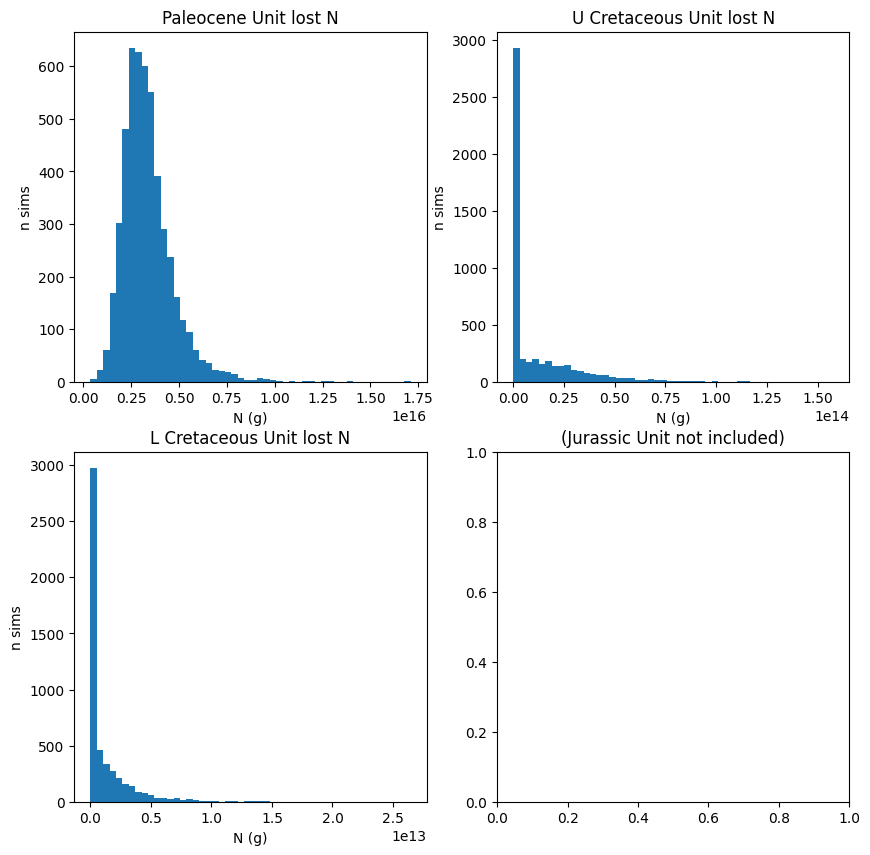

In [15]:
#Plots for Voring-More basins

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].hist(vm_loss_minus_mineral[:,0],bins=50)
ax[0,1].hist(vm_loss_minus_mineral[:,1],bins=50)
ax[1,0].hist(vm_loss_minus_mineral[:,2],bins=50)

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')

ax[0,0].set_ylabel('n sims')
ax[0,1].set_ylabel('n sims')
ax[1,0].set_ylabel('n sims')

ax[0,0].set_title('Paleocene Unit lost N',)
ax[0,1].set_title('U Cretaceous Unit lost N')
ax[1,0].set_title('L Cretaceous Unit lost N')
ax[1,1].set_title('(Jurassic Unit not included)')

print('Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N')

In [16]:
# Greenland calc  (incl. Danmarkshavn and Thetis Basins)

sims = 5000

intervals = 4 # sedimentary units

# unit thickness constraints - based on Fyhn et al. 2021 and Haman et al. 2005
pal_min_z = 0.1 # km  Fyhnn et al. 2021 (depth converted seismic); Haman et al. 2005
pal_max_z = 2  # km  Fyhnn et al. 2021 (depth converted seismic)
ucret_min_z = 0 # km  Fyhnn et al. 2021 (depth converted seismic);# km  Fyhnn et al. 2021
ucret_max_z = 3 # km Fyhnn et al. 2021 (depth converted seismic)
lcret_min_z = 0 #Tkm (depth converted seismic)
lcret_max_z = 16 # km - Fyhnn 2021 (depth converted seismic)
jur_min_z = 0 # km  Fyhnn et al. 2021 (depth converted seismic); Haman et al. 2005
jur_max_z = 4 # km Fyhnn et al., 2021

thickness_ranges = np.array([(pal_min_z,pal_max_z),(ucret_min_z,ucret_max_z),(lcret_min_z,lcret_max_z),(jur_min_z, jur_max_z)]) # thickness ranges top down

# number of vents based on probability dist 
vent_dist = green_kde # vent prob density fcn

#call the FCN for Greenland
gl_total_masses, gl_lost_masses, gl_mineral_N, gl_loss_minus_mineral = total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists, NC_values,loss_fracs)


loop duration:44.75027346611023s


Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N


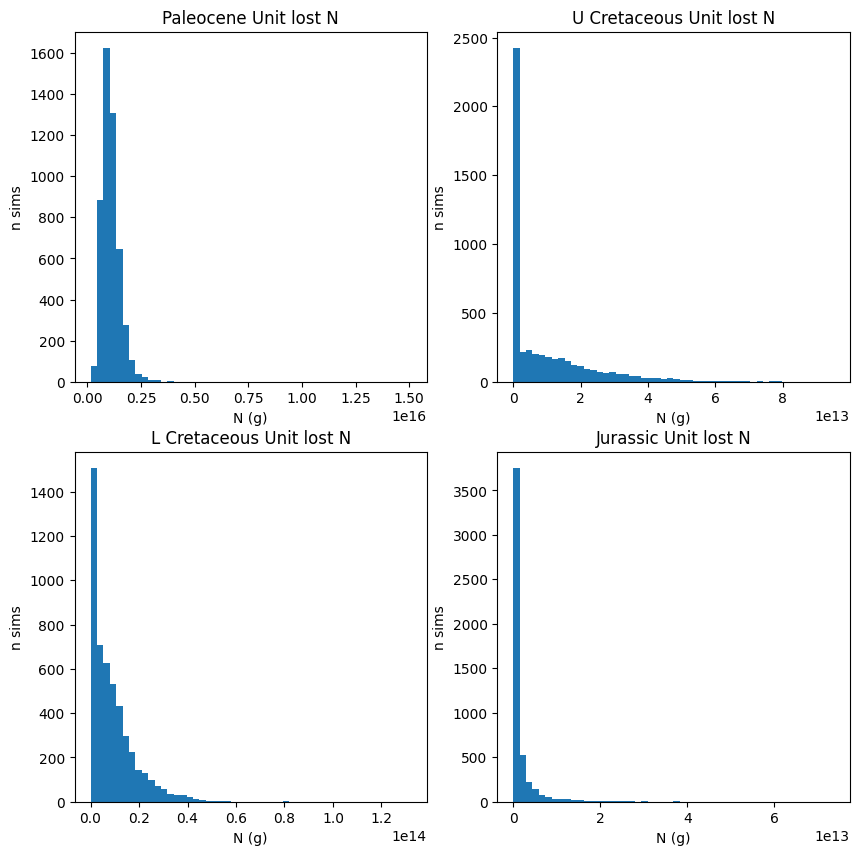

In [17]:
#Greenland plots  (incl. Danmarkshavn and Thetis Basins)

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].hist(gl_loss_minus_mineral[:,0],bins=50)
ax[0,1].hist(gl_loss_minus_mineral[:,1],bins=50)
ax[1,0].hist(gl_loss_minus_mineral[:,2],bins=50)
ax[1,1].hist(gl_loss_minus_mineral[:,3],bins=50)

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')
ax[1,1].set_xlabel('N (g)')

ax[0,0].set_ylabel('n sims')
ax[0,1].set_ylabel('n sims')
ax[1,0].set_ylabel('n sims')
ax[1,1].set_ylabel('n sims')

ax[0,0].set_title('Paleocene Unit lost N',)
ax[0,1].set_title('U Cretaceous Unit lost N')
ax[1,0].set_title('L Cretaceous Unit lost N')
ax[1,1].set_title('Jurassic Unit lost N')

print('Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N')

In [18]:
# Faroe-Shetland calc

sims = 5000

intervals = 4 # sedimentary units

# unit thickness constraints 
pal_min_z = 0.2 * velocity /2 #TWT to km  stoker 2016
pal_max_z = 2 * velocity /2 #TWT to km stoker 2016
ucret_min_z = 0.12 #  km - stoker 2016 (core)
ucret_max_z = 1.216 # km - stoker 2016 (core)
lcret_min_z = 0.759 #  km - stoker 2016 (core)
lcret_max_z = 2.509  # km - stoker 2016 (core)
jur_min_z = 0* velocity / 2 #TWT  stoker 2016
jur_max_z = 0.5 * velocity /2 #TWT to km  stoker 2016

thickness_ranges = np.array([(pal_min_z,pal_max_z),(ucret_min_z,ucret_max_z),(lcret_min_z,lcret_max_z),(jur_min_z, jur_max_z)]) # thickness ranges top down

# number of vents based on probability dist 
vent_dist = farsh_kde # vent numbers dist

#call the FCN for Greenland
fs_total_masses, fs_lost_masses, fs_mineral_N, fs_loss_minus_mineral = total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists, NC_values,loss_fracs)


loop duration:45.13982105255127s


Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N


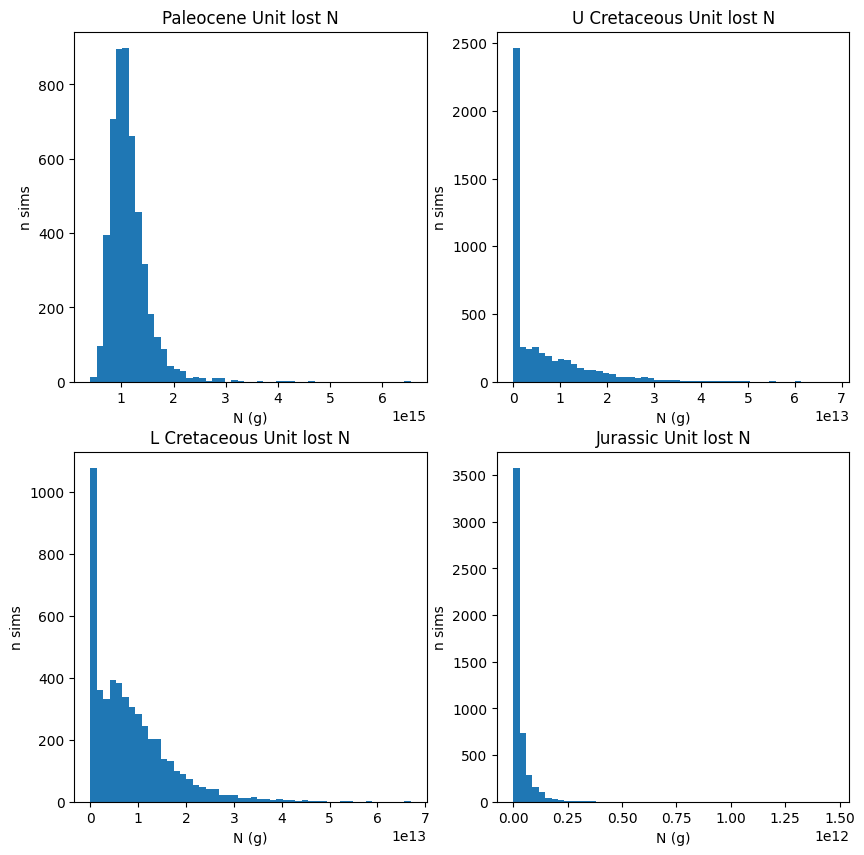

In [19]:
# Faroe-Shetland plots

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].hist(fs_loss_minus_mineral[:,0],bins=50)
ax[0,1].hist(fs_loss_minus_mineral[:,1],bins=50)
ax[1,0].hist(fs_loss_minus_mineral[:,2],bins=50)
ax[1,1].hist(fs_loss_minus_mineral[:,3],bins=50)

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')
ax[1,1].set_xlabel('N (g)')

ax[0,0].set_ylabel('n sims')
ax[0,1].set_ylabel('n sims')
ax[1,0].set_ylabel('n sims')
ax[1,1].set_ylabel('n sims')

ax[0,0].set_title('Paleocene Unit lost N',)
ax[0,1].set_title('U Cretaceous Unit lost N')
ax[1,0].set_title('L Cretaceous Unit lost N')
ax[1,1].set_title('Jurassic Unit lost N')

print('Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N')

In [20]:
# Porcupine Basin estimate

sims = 5000

intervals = 4 # sedimentary units

# unit thickness constraints
pal_min_z =  0.1 * velocity /2 #TWT to km -Whiting et al. 2021
pal_max_z =  0.6 #km Naylor 1987  well data - Whiting et al. 2021
ucret_min_z =0.1 * velocity /2  # km  
ucret_max_z =  0.4 * velocity / 2 #km -  whiting 2021
lcret_min_z = 0 * velocity / 2 #TWT to km
lcret_max_z = 2.65 * velocity / 2 # TWT to km - whiting 2021
jur_min_z = 0* velocity / 2 #TWT 
jur_max_z =  2.25 * velocity / 2 #TWT # km whiting 2021

thickness_ranges = np.array([(pal_min_z,pal_max_z),(ucret_min_z,ucret_max_z),(lcret_min_z,lcret_max_z),(jur_min_z, jur_max_z)]) # thickness ranges top down

# number of vents based on probability dist 
vent_dist = porc_kde # vent numbers dist 

#call the FCN 
pp_total_masses, pp_lost_masses, pp_mineral_N, pp_loss_minus_mineral = total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists, NC_values,loss_fracs)

print(thickness_ranges)

loop duration:28.01119637489319s
[[0.1  0.6 ]
 [0.1  0.4 ]
 [0.   2.65]
 [0.   2.25]]


Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N


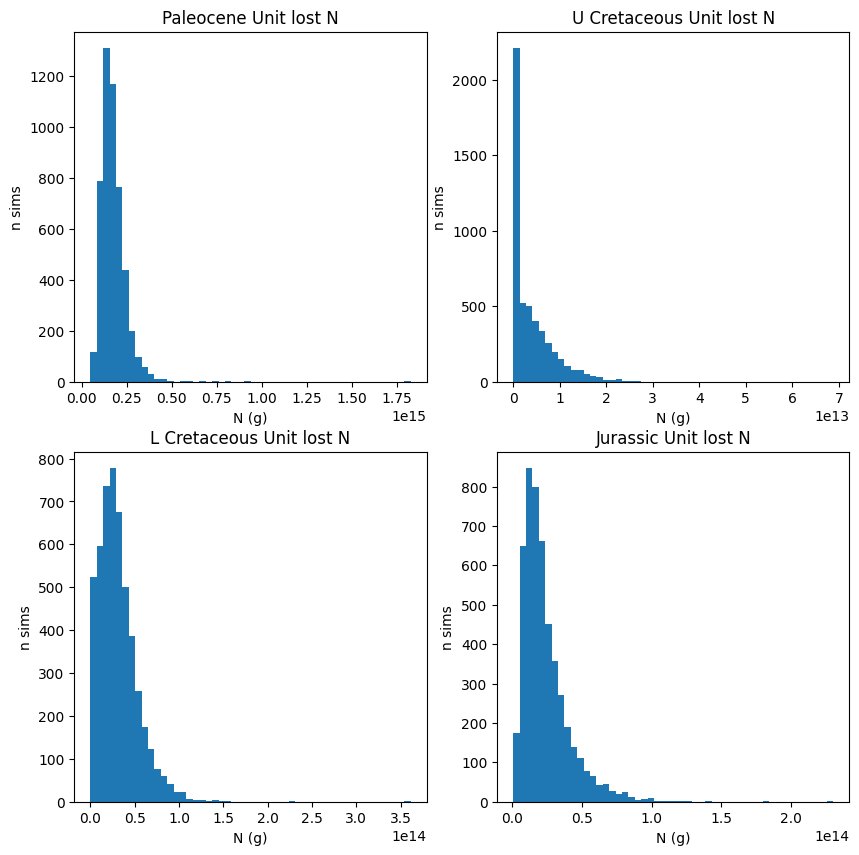

In [21]:
#Porcupine plots

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].hist(pp_loss_minus_mineral[:,0],bins=50)
ax[0,1].hist(pp_loss_minus_mineral[:,1],bins=50)
ax[1,0].hist(pp_loss_minus_mineral[:,2],bins=50)
ax[1,1].hist(pp_loss_minus_mineral[:,3],bins=50)

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')
ax[1,1].set_xlabel('N (g)')

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')
ax[1,1].set_xlabel('N (g)')

ax[0,0].set_ylabel('n sims')
ax[0,1].set_ylabel('n sims')
ax[1,0].set_ylabel('n sims')
ax[1,1].set_ylabel('n sims')

ax[0,0].set_title('Paleocene Unit lost N',)
ax[0,1].set_title('U Cretaceous Unit lost N')
ax[1,0].set_title('L Cretaceous Unit lost N')
ax[1,1].set_title('Jurassic Unit lost N')

print('Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N')

In [22]:
#Rockall estimate

sims = 5000

intervals = 4 # sedimentary units

# estimated unit thicknesses
pal_min_z =   0.1 * velocity /2 #TWT to km 
pal_max_z =  0.9 * velocity / 2 #km  Corfield 1999
ucret_min_z = 0.1 * velocity /2  # km   musgrove 1996
ucret_max_z = 2.2  * velocity / 2 #km musgrove 1996
lcret_min_z = 0 * velocity / 2 #TWT to km musgrove 1996
lcret_max_z =  1.8 * velocity / 2 #TWT musgrove 1996
jur_min_z = 0 * velocity / 2 #Corfield 1999
jur_max_z =  1.5 * velocity / 2 #Corfield 1999
thickness_ranges = np.array([(pal_min_z,pal_max_z),(ucret_min_z,ucret_max_z),(lcret_min_z,lcret_max_z),(jur_min_z, jur_max_z)]) # thickness ranges top down

# number of vents based on probability dist 
vent_dist = rock_kde # vent numbers dist

#call the FCN 
rp_total_masses, rp_lost_masses, rp_mineral_N, rp_loss_minus_mineral = total_mass_loss_fcn(sims,rads_kde,vent_dist,thickness_ranges,intervals,TOC_dists, NC_values,loss_fracs)


loop duration:108.07064890861511s


Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N


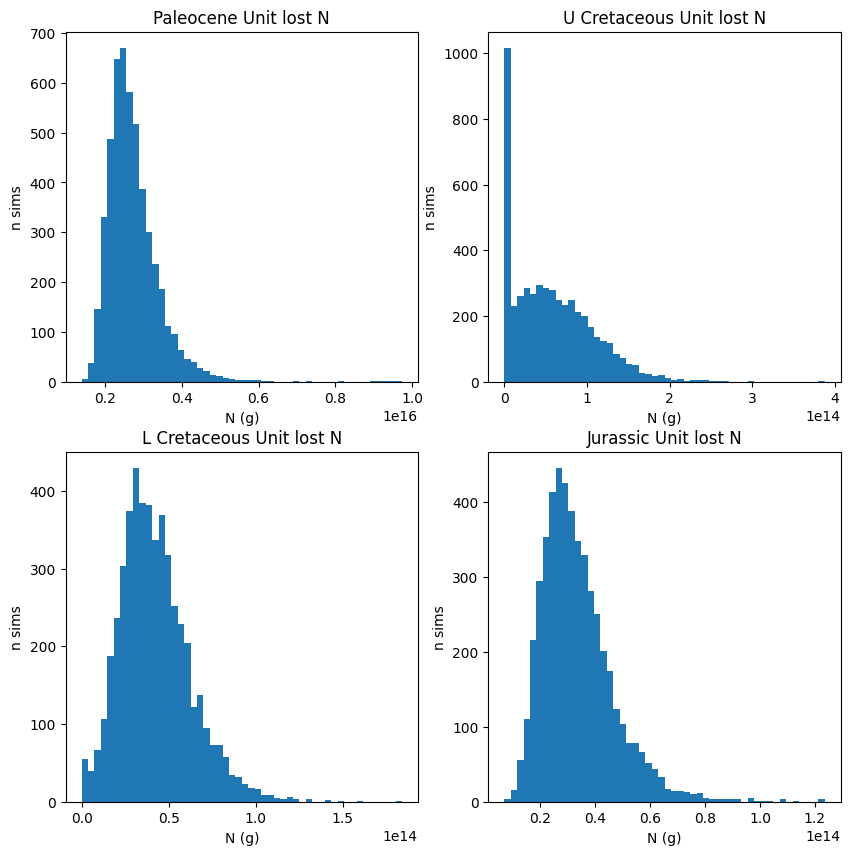

In [23]:
#Rockall Plateau plots

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].hist(rp_loss_minus_mineral[:,0],bins=50)
ax[0,1].hist(rp_loss_minus_mineral[:,1],bins=50)
ax[1,0].hist(rp_loss_minus_mineral[:,2],bins=50)
ax[1,1].hist(rp_loss_minus_mineral[:,3],bins=50)

ax[0,0].set_xlabel('N (g)')
ax[0,1].set_xlabel('N (g)')
ax[1,0].set_xlabel('N (g)')
ax[1,1].set_xlabel('N (g)')


ax[0,0].set_ylabel('n sims')
ax[0,1].set_ylabel('n sims')
ax[1,0].set_ylabel('n sims')
ax[1,1].set_ylabel('n sims')


ax[0,0].set_title('Paleocene Unit lost N',)
ax[0,1].set_title('U Cretaceous Unit lost N')
ax[1,0].set_title('L Cretaceous Unit lost N')
ax[1,1].set_title('Jurassic Unit lost N')

print('Plots below show the lost organic nitrogen mass from each unit, minus the amount estimated to be trapped as mineral N')

average ratio of total mineral to total lost org-N: 0.5269294949689509
total lost mass percentiles:
10th percentile: 6990773807376225.0 g
25th percentile: 7662984036193166.0 g
50th percentile: 8538777196307792.0 g
75th percentile: 9585080711948080.0 g
90th percentile: 1.0743113830473236e+16 g
mean: 8754492780307692.0


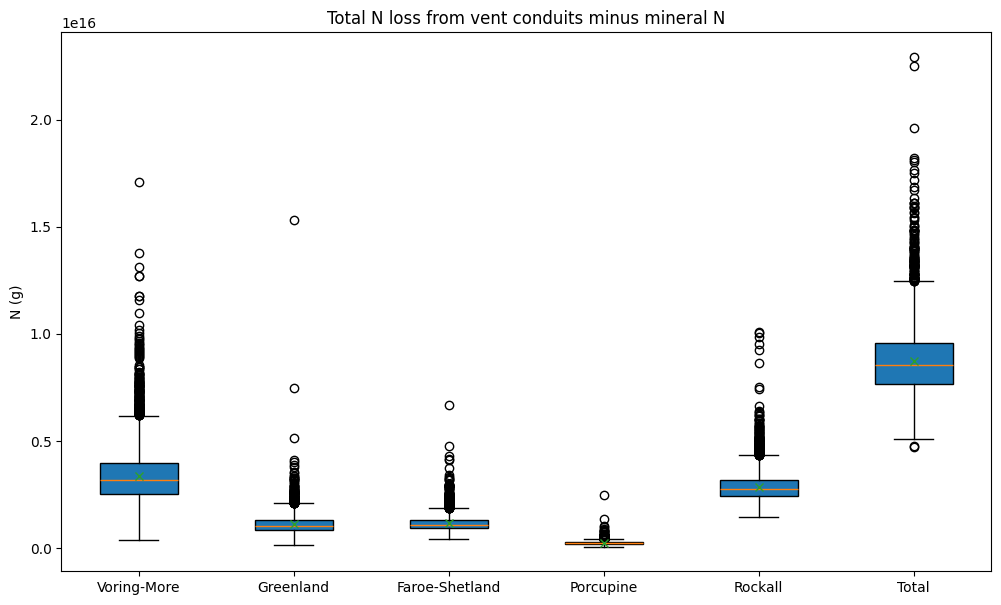

In [25]:
# Summary of lost mineral N (accounting for mineral trapping) and plot

NAIP_total_losses = np.sum(((vm_lost_masses,gl_lost_masses,fs_lost_masses,pp_lost_masses,rp_lost_masses)),axis=0)
NAIP_total_mineral_N = np.sum(((vm_mineral_N,gl_mineral_N,fs_mineral_N,pp_mineral_N,rp_mineral_N)),axis=0)
NAIP_total_losses_minus_mineral = np.sum(((vm_loss_minus_mineral,gl_loss_minus_mineral,fs_loss_minus_mineral,pp_loss_minus_mineral,rp_loss_minus_mineral)),axis=0)
NAIP_total_mineral_N_sum  = np.sum(NAIP_total_mineral_N,axis=1)
NAIP_total_losses_sum  = np.sum(NAIP_total_losses,axis=1)
NAIP_losses_minus_mineral_sum = np.sum(NAIP_total_losses_minus_mineral ,axis=1)
print(f'average ratio of total mineral to total lost org-N: {np.average(NAIP_total_mineral_N_sum/NAIP_total_losses_sum)}')


data = np.sum([vm_loss_minus_mineral,gl_loss_minus_mineral,fs_loss_minus_mineral,pp_loss_minus_mineral,rp_loss_minus_mineral,NAIP_total_losses_minus_mineral],axis=2).T


fig, ax = plt.subplots(figsize=(12,7))
ax.boxplot(data,patch_artist=True, showmeans='true',meanprops={"marker": "x"})
ax.set_xticklabels(['Voring-More','Greenland','Faroe-Shetland','Porcupine','Rockall','Total'])
ax.set_ylabel('N (g)')
ax.set_title('Total N loss from vent conduits minus mineral N')

# plt.savefig("box_whisker_mineral.pdf",format="pdf") # save fig

print('total lost mass percentiles:')
print(f'10th percentile: {np.percentile(data[:,5],10)} g')
print(f'25th percentile: {np.percentile(data[:,5],25)} g')
print(f'50th percentile: {np.percentile(data[:,5],50)} g')
print(f'75th percentile: {np.percentile(data[:,5],75)} g')
print(f'90th percentile: {np.percentile(data[:,5],90)} g')

print(f'mean: {np.average(data[:,5])}')


##  References
<hr style="border: solid 3px red">

Arnaboldi, M., Meyers, P. A., Tucholke, B., Sibuet, J. C., & Klaus, A. (2006, November). Data Report: Multi-proxy geochemical characterization of OAE-related black shales at Site 1276, Newfoundland basin. In Proceedings of the Ocean Drilling Program, Scientific Results (Vol. 210, pp. 1-16). College Station TX.

Corfield, S., Murphy, N., & Parker, S. (1999). The structural and stratigraphic framework of the Irish Rockall Trough. In Geological Society, London, Petroleum Geology Conference Series (Vol. 5, No. 1, pp. 407-420). The Geological Society of London.

Fyhn, M. B., Hopper, J. R., Sandrin, A., Lauridsen, B. W., Heincke, B. H., Nøhr-Hansen, H., ... & Nielsen, T. (2021). Three-phased latest Jurassic–Eocene rifting and mild mid-Cenozoic compression offshore NE Greenland. Tectonophysics, 815, 228990.

Hamann, N., Whittaker, R., & Stemmerik, L. (2005). Geological development of the Northeast Greenland Shelf. In Geological Society, London, Petroleum Geology Conference Series (Vol. 6, No. 1, pp. 887-902). The Geological Society of London.

Henderson, G. (1969). Oil and gas prospects in the Cretaceous-Tertiary basin of West Greenland. Rapport Grønlands Geologiske Undersøgelse, 22, 1-63.
Langrock, U., Stein, R., Lipinski, M. & Brumsack, H. J. Late Jurassic to Early Cretaceous black shale formation and paleoenvironment in high northern latitudes: Examples from the Norwegian-Greenland Seaway. Paleoceanography 18, (2003).

Jackson, C. A. L., Magee, C., & Jacquemyn, C. (2020). Rift-related magmatism influences petroleum system development in the NE Irish Rockall Basin, offshore Ireland. Petroleum Geoscience, 26(4), 511-524.

Langrock, U., Stein, R., Lipinski, M., & Brumsack, H. J. (2003a). Late Jurassic to Early Cretaceous black shale formation and paleoenvironment in high northern latitudes: Examples from the Norwegian‐Greenland Seaway. Paleoceanography, 18(3).

Langrock, U., Stein, R., Lipinski, M., & Brumsack, H. J. (2003b). Paleoenvironment and sea-level change in the early Cretaceous Barents Sea—implications from near-shore marine sapropels. Geo-Marine Letters, 23(1), 34-42.

Layfield, L. K., Schofield, N., Watson, D., Holford, S. P., Jolley, D. W., Kilhams, B. A., ... & Widdowson, M. (2023). 3D Seismic reflection evidence for lower crustal intrusions beneath the Faroe–Shetland Basin, NE Atlantic Margin. Journal of the Geological Society, 180(5), jgs2022-172.

Morse, S. J. (2013). The supply of siliclastic input to potential Late Paleocene sub-basaltic reservoirs in the Faroe Shetland Basin (Masters dissertation, Royal Holloway University of London).

Musgrove, F. W., & Mitchener, B. (1996). Analysis of the pre-Tertiary rifting history of the Rockall Trough. Petroleum Geoscience, 2(4), 353-360.

Park, J., Stein, H. J., Hannah, J. L., Georgiev, S. V., Hammer, Ø., & Olaussen, S. (2024). Paleoenvironment in the circum-arctic region from the Middle Jurassic to Early Cretaceous: Trace element and stable isotope geochemistry of the Agardhfjellet Formation, Svalbard. Palaeogeography, Palaeoclimatology, Palaeoecology, 649, 112333.

Ruvalcaba Baroni, I., Van Helmond, N. A. G. M., Tsandev, I., Middelburg, J. J., & Slomp, C. P. (2015). The nitrogen isotope composition of sediments from the proto‐North Atlantic during Oceanic Anoxic Event 2. Paleoceanography, 30(7), 923-937.

Shannon, P. M., Jacob, A. W. B., O’reilly, B. M., Hauserr, F., Readman, P. W., & Makris, J. (1999). Structural setting, geological development and basin modelling in the Rockall Trough. In Geological Society, London, Petroleum Geology Conference series (Vol. 5, No. 1, pp. 421-431). The Geological Society of London.

Stoker, M. S. (2016). Cretaceous tectonostratigraphy of the Faroe–Shetland region. Scottish journal of geology, 52(1), 19-41.

Whiting, L., Haughton, P. D., & Shannon, P. M. (2021). From rifting to hyperextension: Upper Jurassic–lower cretaceous tectono‐stratigraphy of the Porcupine Basin, Irish Atlantic margin. Basin Research, 33(2), 1662-1696.

Zastrozhnov, D., Gernigon, L., Gogin, I., Planke, S., Abdelmalak, M. M., Polteau, S., ... & Myklebust, R. (2020). Regional structure and polyphased Cretaceous-Paleocene rift and basin development of the mid-Norwegian volcanic passive margin. Marine and Petroleum Geology, 115, 104269.